In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image

In [29]:
# pip install split-folders

In [30]:
# import splitfolders

# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# input_folder=r"/content/drive/MyDrive/garbage_classifcation/Dataset"
# output=r"/content/drive/MyDrive/garbage_classifcation/binary_dataset"
# splitfolders.ratio(input_folder, output=output,
#     seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

In [31]:
img_width, img_height = 224, 224

train_data_dir = r'/content/drive/MyDrive/garbage_classifcation/binary_dataset/train'
validation_data_dir = r'/content/drive/MyDrive/garbage_classifcation/binary_dataset/val'
nb_train_samples = 8000
nb_validation_samples = 1800
epochs = 100
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1574 images belonging to 2 classes.
Found 457 images belonging to 2 classes.


In [32]:
from numpy.random import seed
seed(1)

In [33]:
import tensorflow
tensorflow.random.set_seed(2)

In [34]:
from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
#Create a VGG19 model, and removing the last layer that is classifying 1000 images. 
#This will be replaced with images classes we have. 

#VGG-19 is a convolutional neural network that is 19 layers deep.
#You can load a pretrained version of the network trained on more than a million images from the ImageNet database.
#The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. 
#As a result, the network has learned rich feature representations for a wide range of images. 
#The network has an image input size of 224-by-224

In [35]:
from tensorflow.keras import layers
#from keras.models import load_model
#from keras.layers import Lambda
import tensorflow as tf

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
# Add a fully connected layer with 224 hidden units and ReLU activation

y = layers.Dense(224, activation='relu')(x)
# x to be equal to the pretrained models outputs (after applying an additional dense layer).

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

#base_model.input define inputs to be equal to the inputs of the pretrained model.
#"model = tf.keras.models.Model(base_model.input, x)" statement just tells tensorflow,
#that it is supposed to treat this information flow as a new model,
#so that you can easily pass new information through all of these layers by just using this new model.

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
model.summary()
for layer in base_model.layers:
    layer.trainable = False

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

custom_early_stopping = EarlyStopping(
    monitor='val_acc', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [37]:
print(len(train_data_dir))

steps_per_epoch = len(train_data_dir)//batch_size

print(steps_per_epoch)

validation_steps = len(validation_data_dir)//batch_size # if you have validation data 

print(validation_steps)

65
2
1


In [38]:
#vgghist = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 100, epochs = epochs,callbacks=[custom_early_stopping])
vgghist = model.fit(train_generator, validation_data = test_generator,
                    epochs = epochs, callbacks=[custom_early_stopping])




















Epoch 1/100
50/50 [==============================] - 31s 583ms/step - loss: 0.6821 - acc: 0.6125 - val_loss: 0.4795 - val_acc: 0.7505
Epoch 2/100
50/50 [==============================] - 29s 580ms/step - loss: 0.5916 - acc: 0.7427 - val_loss: 0.4727 - val_acc: 0.7637
Epoch 3/100
50/50 [==============================] - 30s 592ms/step - loss: 0.5285 - acc: 0.8011 - val_loss: 0.3602 - val_acc: 0.8621
Epoch 4/100
50/50 [==============================] - 29s 596ms/step - loss: 0.3724 - acc: 0.8393 - val_loss: 0.3087 - val_acc: 0.8665
Epoch 5/100
50/50 [==============================] - 30s 592ms/step - loss: 0.3842 - acc: 0.8431 - val_loss: 0.2694 - val_acc: 0.8972
Epoch 6/100
50/50 [==============================] - 30s 598ms/step - loss: 0.3407 - acc: 0.8450 - val_loss: 0.4843 - val_acc: 0.8184
Epoch 7/100
50/50 [==============================] - 31s 607ms/step - loss: 0.3229 - acc: 0.8710 - val_loss: 0.4444 - val_acc: 0.8578
Epoch 8/100
50/50 [==============================] - 30s 600ms

In [39]:

from tensorflow.keras.preprocessing import image
#output_class = [ "e-waste", "plastic"]
output_class = [ "e-waste"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  # print(predicted_array)

  class_one = predicted_array > 0.5

  # print(class_one[0][0])
  # print(type(class_one[0][0]))

  if(class_one[0][0]==True):{
      print("The waste material is plastic")
  }
  else:{
      print("The waste material is e-waste")
  }

You are doing binary classification. So you have a Dense layer consisting of one unit with an activation function of sigmoid. Sigmoid function outputs a value in range [0,1] which corresponds to the probability of the given sample belonging to positive class (i.e. class one). Everything below 0.5 is labeled with zero (i.e. negative class) and everything above 0.5 is labeled with one. So to find the predicted class you can do the following:

preds = model.predict(data)

class_one = preds > 0.5

The true elements of class_one correspond to samples labeled with one (i.e. positive class).

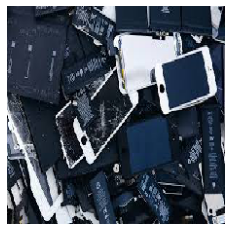

The waste material is e-waste


In [40]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/ewaste.jpg")

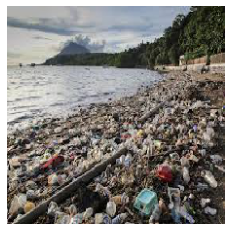

The waste material is plastic


In [41]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/plastic2.jpg")

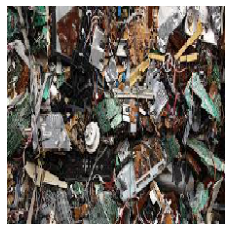

The waste material is e-waste


In [42]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/e-waste2.jpg")

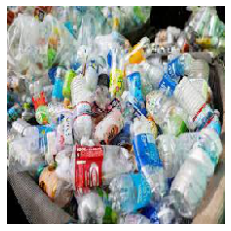

The waste material is plastic


In [43]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/plastic.jpg")

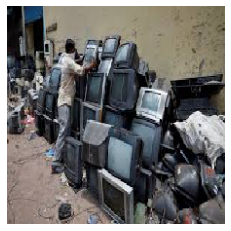

The waste material is e-waste


In [44]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/ewaste 3.jpg")

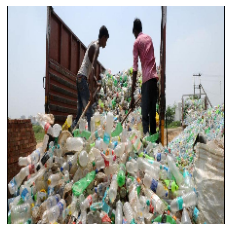

The waste material is plastic


In [45]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/plastic3.jpg")

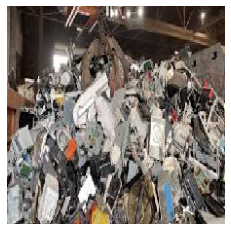

The waste material is e-waste


In [46]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/ewaste 4.jpg")

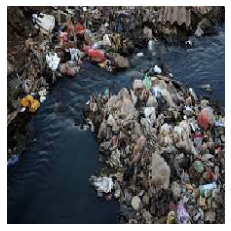

The waste material is plastic


In [47]:
waste_prediction("/content/drive/MyDrive/garbage_classifcation/plastic4.jpg")

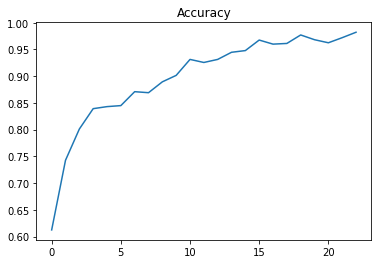

In [48]:
plt.title("Accuracy")
plt.plot(vgghist.history["acc"])
plt.show()

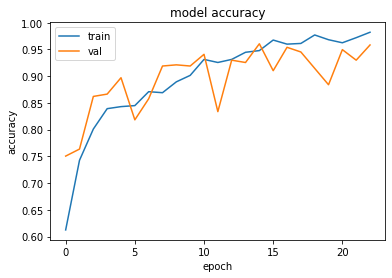

In [49]:

plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

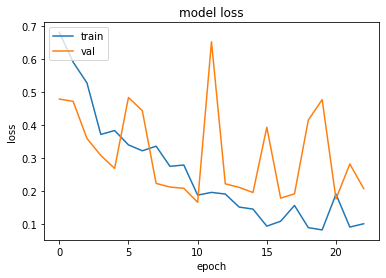

In [50]:
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

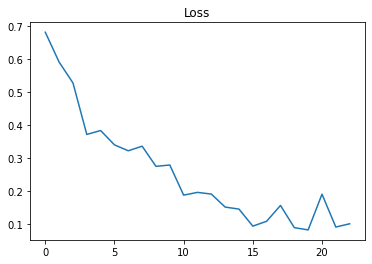

In [51]:
plt.title("Loss")
plt.plot(vgghist.history["loss"])
plt.show()

In [52]:
model.save("classifyWaste.h5")